<a href="https://www.kaggle.com/code/romanniki/creativity-is-4-losers-science-to-find-hit-song?scriptVersionId=182916729" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="preparation"></a>
# <b><span style='color:#5D9299'>2 |</span><span style='color:#DC714E'> 🚩 Preparation</span></b>

<a id="import-libraries"></a>
# <b><span style='color:#5D9299'>2.1  |</span><span style='color:#DC714E'> 📔 Import Libraries</span></b>

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd 
import plotly.express as px
from scipy.stats import mode
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

<a id="loading-files"></a>
# <b><span style='color:#5D9299'>2.2  |</span><span style='color:#DC714E'> 🗃️ Loading Files </span></b>
<font color='black' size='2' face='Sans Serif'>

In [48]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/determine-the-popularity-of-music-tracks/musicdata.csv
/kaggle/input/30000-spotify-songs/readme.md
/kaggle/input/30000-spotify-songs/spotify_songs.csv
/kaggle/input/spotify-12m-songs/tracks_features.csv


In [49]:
musicdata = pd.read_csv('/kaggle/input/30000-spotify-songs/spotify_songs.csv')
musicdata.head(1)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102,0.0,0.0653,0.518,122.036,194754


In [50]:
musicdata.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


<a id="data-cleaning"></a>
# <b><span style='color:#5D9299'>3  |</span><span style='color:#DC714E'> 🧹 Data Cleaning</span></b>

<a id="adjust-data-format"></a>
# <b><span style='color:#5D9299'>3.1  |</span><span style='color:#DC714E'> 📚 Adjust Data Format (+ Entry)</span></b>

In [51]:
short_dates = musicdata[musicdata['track_album_release_date'].str.len() < 10]
short_dates.shape

(1886, 23)

In [52]:
musicdata['track_album_release_date'] = musicdata['track_album_release_date'].apply(
    lambda x: f"{x}-01-01" if len(x) < 10 else x
)

musicdata['track_album_release_date'] = pd.to_datetime(musicdata['track_album_release_date'], errors='coerce')

# <b><span style='color:#5D9299'>3.2  |</span><span style='color:#DC714E'> 👥 Dublicates</span></b>
<a id="duplicates"></a>

In [53]:
duplicates = musicdata[musicdata.duplicated()]
num_duplicates = duplicates.shape[0]
print(num_duplicates)

0


In [54]:
# a lot of duplicates here. You really need to investgate dataset to pay attention to such thing. Because some info maybe be differ insome columns

duplicates = musicdata[musicdata.duplicated(subset=['track_id'])]
num_duplicates = duplicates.shape[0]
print(num_duplicates)

4477


In [55]:
musicdata = musicdata.drop_duplicates(subset=['track_id'])

<a id="missing-values"></a>

# <b><span style='color:#5D9299'>3.3  |</span><span style='color:#DC714E'> 🕵️ Missing Values</span></b>

In [56]:
missing_values_count = musicdata.isnull().sum()
missing_values_count

track_id                     0
track_name                   4
track_artist                 4
track_popularity             0
track_album_id               0
track_album_name             4
track_album_release_date    25
playlist_name                0
playlist_id                  0
playlist_genre               0
playlist_subgenre            0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
duration_ms                  0
dtype: int64

<a id="feature-engineering"></a>
# <b><span style='color:#5D9299'>4  |</span><span style='color:#DC714E'> 🎚️ Feature Engineering</span></b>

<a id="encoding"></a>
# <b><span style='color:#5D9299'>4.1  |</span><span style='color:#DC714E'> 🧬 Encoding</span></b>

In [57]:
def categorize_popularity(popularity):
    if popularity < 40:
        return 'Low'
    elif popularity < 75:
        return 'Medium'
    else:
        return 'High'

musicdata['Popularity Category'] = musicdata['track_popularity'].apply(categorize_popularity)

In [58]:
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

musicdata['Popularity Category Encoded'] = ordinal_encoder.fit_transform(musicdata[['Popularity Category']])

In [59]:
label_encoder = LabelEncoder()

musicdata['playlist_subgenre_encoded'] = label_encoder.fit_transform(musicdata['playlist_subgenre'])
musicdata['playlist_genre_encoded'] = label_encoder.fit_transform(musicdata['playlist_genre'])

print("Mapping for playlist_subgenre:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")

print("\nMapping for playlist_genre:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")

Mapping for playlist_subgenre:
edm: 0
latin: 1
pop: 2
r&b: 3
rap: 4
rock: 5

Mapping for playlist_genre:
edm: 0
latin: 1
pop: 2
r&b: 3
rap: 4
rock: 5


<div style="background-color:#8ADBE6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#222C47;"><b>📙 Purpose of New Features
       </b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;color:#222C47;">       If we are really keen to understand, what might affect the hotness of the tracks, we also need to define the 'Hits'. To build a hypothesis of what features influence the song popularity.</p>
    
    
 <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;color:#222C47;">  If you wonder why the classification of the popularity is specificaly at the points above, that is my raw personal choice. To provide reasons for such params, I looked at distribution curve first. Then, I looked at the tracks in range 60 to 85 points and found that sweet spot, just around ~75. We don't have a research to find a good sound, we are here to set what is the banger song is and how to eat it. </p>

<a id="eda"></a>
# <b><span style='color:#5D9299'>5  |</span><span style='color:#DC714E'> 📊 EDA </span></b>

<Axes: >

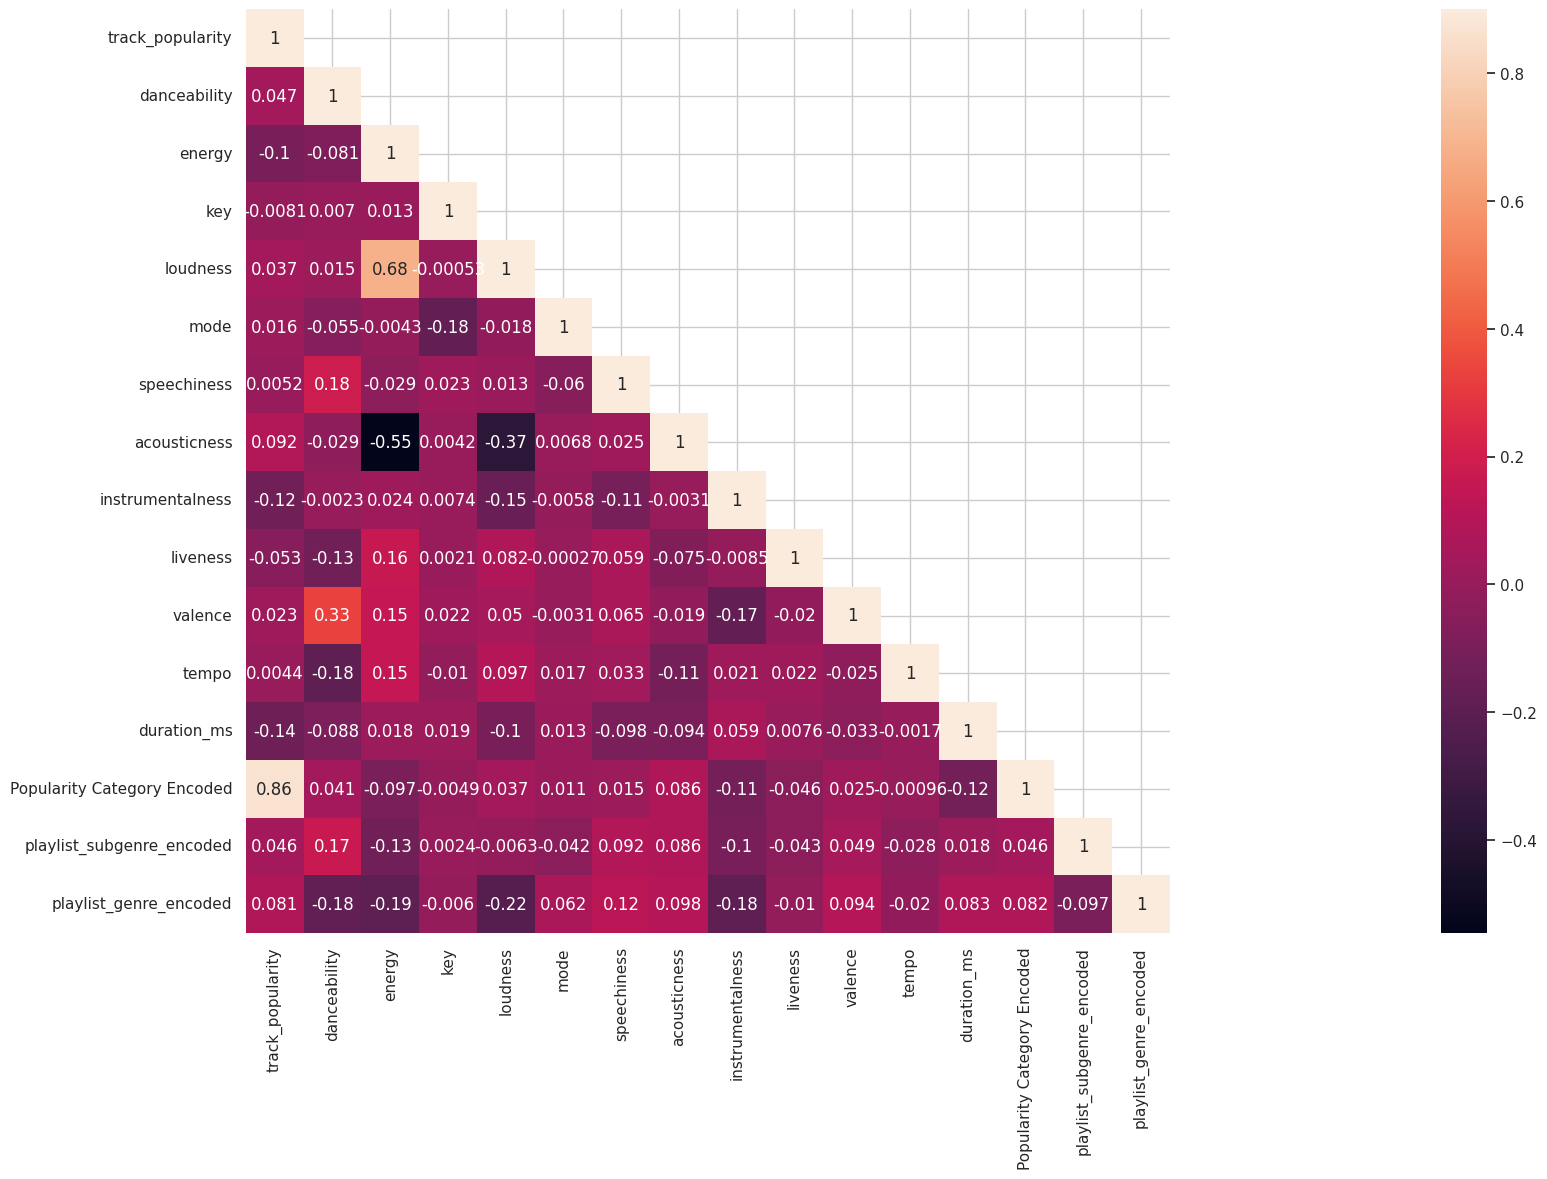

In [60]:
numeric_musicdata = musicdata.select_dtypes(include=['int64', 'float64'])

corr = numeric_musicdata.corr(method='pearson')
mask = np.array(corr)

mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (16,12))
fig.set_size_inches(70,12)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

<div style="background-color:#8ADBE6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:28px; font-family:calibri; color:#222C47;"><b>Explanation of High Correlations:
</b></h1>
   
<h1 style="font-size:22px; font-family:calibri; color:#222C47;"><b> Loudness and Energy (0.68)</b></h1>

Loudness measures the amplitude of the audio signal, while energy captures the overall intensity and activity level of the track. High-energy tracks, which are often used in genres like EDM, rock, and pop, are typically produced with higher loudness levels to evoke excitement and engagement.
    
<h1 style="font-size:22px; font-family:calibri; color:#222C47;"><b> Acousticness and Energy (-0.55)</b></h1>

Energy measures the intensity and activity level of the music, and acoustic tracks tend to have more relaxed and subdued characteristics, leading to lower energy ratings. Acoustic music often features instruments like acoustic guitars, pianos, and soft vocals, which contribute to a soothing and less energetic feel.

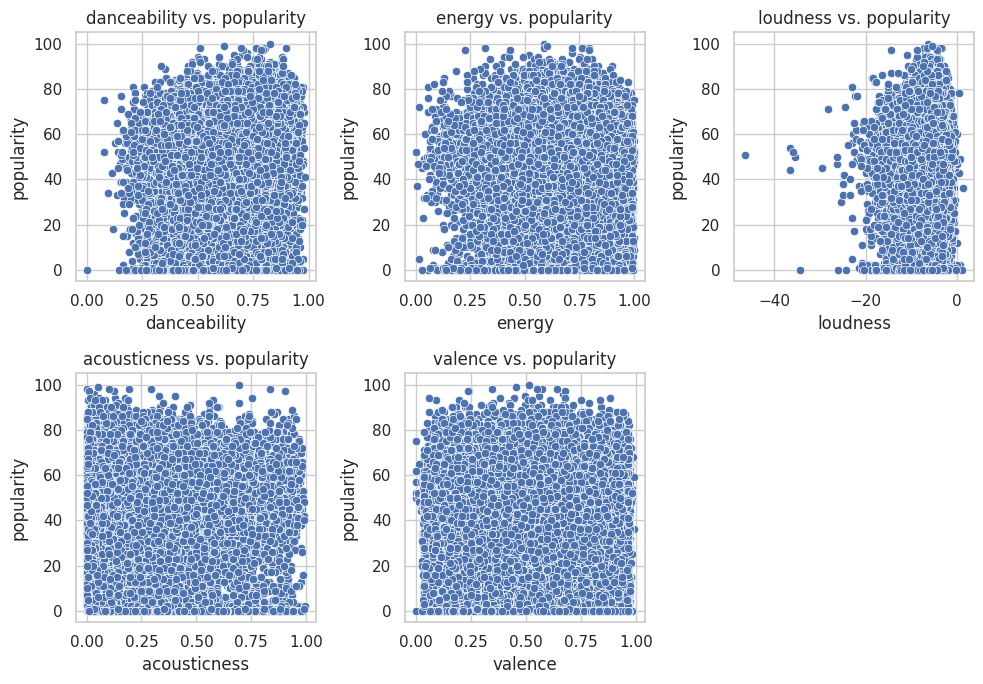

In [61]:
features = ['danceability', 'energy', 'loudness', 'acousticness', 'valence']
plt.figure(figsize=(10, 7))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=musicdata[feature], y=musicdata['track_popularity'])
    plt.title(f'{feature} vs. popularity')
    plt.xlabel(feature)
    plt.ylabel('popularity')

plt.tight_layout()
plt.show()

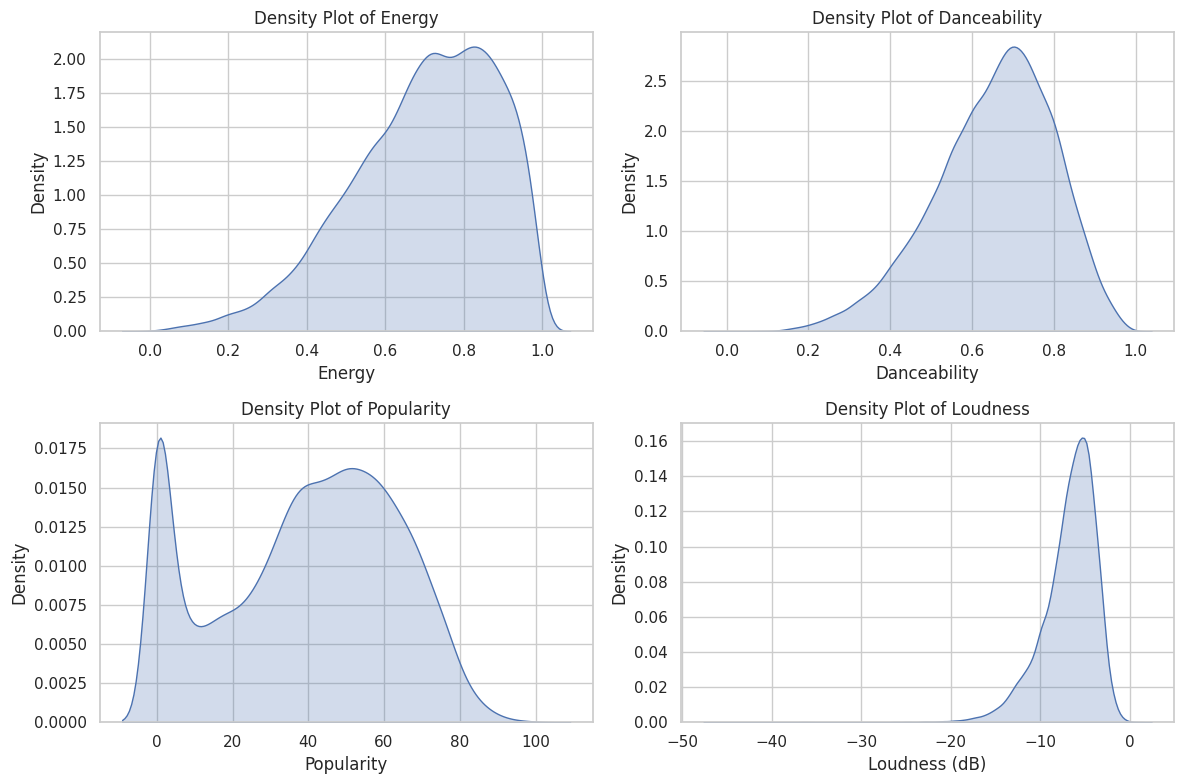

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.kdeplot(data=musicdata['energy'], shade=True, color='b', ax=axes[0, 0])
axes[0, 0].set_xlabel('Energy')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Density Plot of Energy')

sns.kdeplot(data=musicdata['danceability'], shade=True, color='b', ax=axes[0, 1])
axes[0, 1].set_xlabel('Danceability')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Density Plot of Danceability')

sns.kdeplot(data=musicdata['track_popularity'], shade=True, color='b', ax=axes[1, 0])
axes[1, 0].set_xlabel('Popularity')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Density Plot of Popularity')

sns.kdeplot(data=musicdata['loudness'], shade=True, color='b', ax=axes[1, 1])
axes[1, 1].set_xlabel('Loudness (dB)')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Density Plot of Loudness')

plt.tight_layout()
plt.show()

<div style="background-color:#8ADBE6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#222C47;"><b> Multimodal Density of Popularity Distribution:
       </b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;color:#222C47;">
Looks like there is a 'popularity wall'. in which level of popularity of the tracks stucked below 20. Shall we investigate if it's just unpopular songs or a bad taste?  
        
 <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;color:#222C47;">       
The second distribution curve shows the peak density at 40-60 points. </p>
    

<h1 style="font-size:24px; font-family:calibri; color:#222C47;"><b>Energy Normal Distribution:</b></h1>
    
<p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;color:#222C47;">       
There is a prominent peak in the distribution around the energy level of 0.75 to 0.8, indicating that many tracks in the dataset are quite energetic. </p>
    
    
<h1 style="font-size:24px; font-family:calibri; color:#222C47;"><b>Danceability Normal Distribution:</b></h1>

    
<p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;color:#222C47;">       
The peak density occurs around a danceability score of 0.7 to 0.8, suggesting that many tracks are designed to be dance-friendly. </p>

    
<h1 style="font-size:24px; font-family:calibri; color:#222C47;"><b>Loudness Normal Distribution:</b></h1>

    
<p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;color:#222C47;">       
In this context, loudness values are typically negative, as 0 dB would represent the maximum loudness level (which is not common for individual tracks) and negative values represent softer sounds. The majority of the tracks have a loudness between approximately -5 dB and -15 dB.</p>

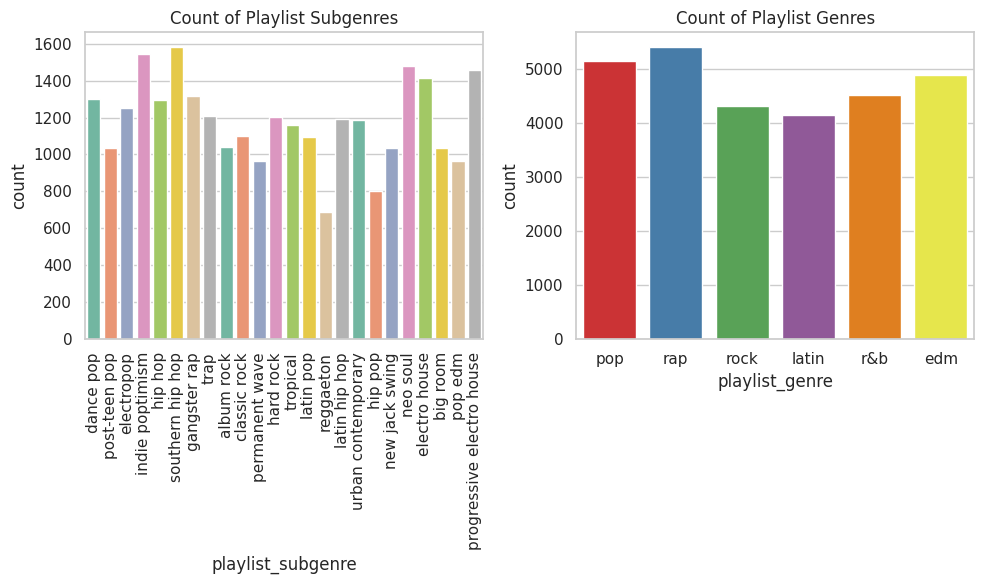

In [63]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

sns.countplot(x='playlist_subgenre', data=musicdata, ax=axes[0], palette="Set2")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  

axes[0].set_title('Count of Playlist Subgenres')

sns.countplot(x='playlist_genre', data=musicdata, ax=axes[1], palette="Set1")
axes[1].set_title('Count of Playlist Genres')

plt.tight_layout()
plt.show()

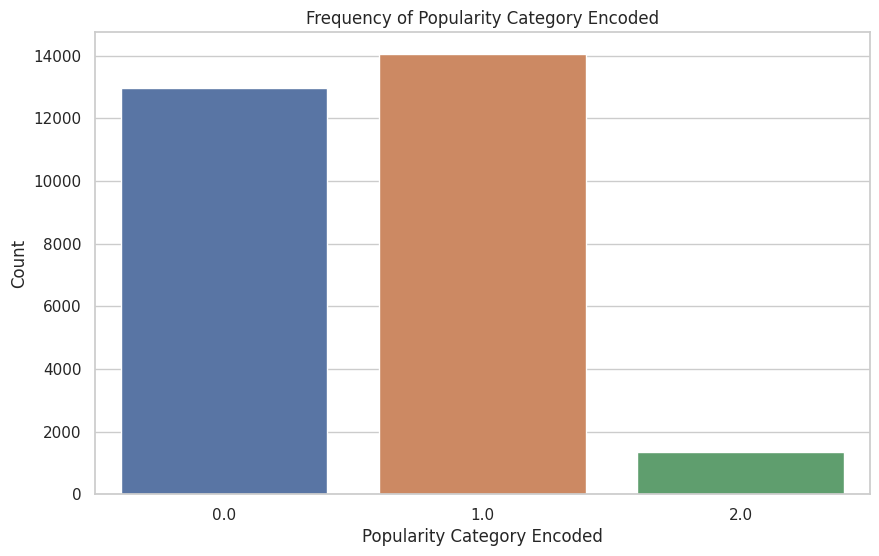

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(data=musicdata, x='Popularity Category Encoded')
plt.title('Frequency of Popularity Category Encoded')
plt.xlabel('Popularity Category Encoded')
plt.ylabel('Count')
plt.show()

<div style="background-color:#FF0000; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">

<font color='black' size='4' face='Tenor Sans'>
    
    
    Explanation of Popularity Classification:  
  
     
    Around 20% of the tracks are considered 'Hits'.  
      
      
    That sounds about right.
    
<font color='black' size='2' face='Tenor Sans'>


<a id="modelling"></a>
# <b><span style='color:#5D9299'>6  |</span><span style='color:#DC714E'> Statistical Modelling of Music Features</span></b>

<a id="modelling61"></a>
# <b><span style='color:#5D9299'>6.1  |</span><span style='color:#DC714E'> Modelling for All Songs </span></b>

In [65]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'playlist_subgenre_encoded', 'playlist_genre_encoded']
X = musicdata[features]
y = musicdata['track_popularity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=77)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients = pd.Series(model.coef_, index=features)
coefficients

danceability                 1.301343
energy                      -4.098327
key                         -0.072550
loudness                     4.438369
mode                         0.334067
speechiness                 -0.765078
acousticness                 1.381892
instrumentalness            -1.856835
liveness                    -0.528709
valence                      0.051650
tempo                        0.652454
playlist_subgenre_encoded    0.314676
playlist_genre_encoded       1.920199
dtype: float64

In [66]:
coefficients_sorted = coefficients.sort_values(ascending=False)

fig = px.bar(
    x=coefficients_sorted.values, 
    y=coefficients_sorted.index, 
    orientation='h', 
    title='Feature Coefficients in Logistic Regression Model',
    labels={'x': 'Coefficient Value', 'y': 'Feature'},
    color=coefficients_sorted.values, 
    color_continuous_scale=px.colors.sequential.Viridis
)

fig.update_layout(
    xaxis_title='Coefficient Value',
    yaxis_title='Feature',
    yaxis=dict(autorange="reversed"), 
    template='plotly_white'
)

fig.show()

<a id="modelling62"></a>
# <b><span style='color:#5D9299'>6.2  |</span><span style='color:#DC714E'> Modelling for HITs </span></b>

In [67]:
popular_musicdata = musicdata[musicdata['Popularity Category Encoded'] == 2]

features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'playlist_subgenre_encoded', 'playlist_genre_encoded']
X = popular_musicdata[features]
y = popular_musicdata['track_popularity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=77)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients = pd.Series(model.coef_, index=features)
coefficients

danceability                 0.227296
energy                      -1.034401
key                          0.279244
loudness                     0.668941
mode                        -0.109783
speechiness                  0.170801
acousticness                 0.141556
instrumentalness            -0.042245
liveness                    -0.091435
valence                      0.011868
tempo                        0.139739
playlist_subgenre_encoded   -0.126120
playlist_genre_encoded      -0.434873
dtype: float64

In [68]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 22.143608618112467
R-squared (R²): 0.0543836519066927


In [69]:
sorted_coefficients = coefficients.sort_values()

fig = px.bar(
    x=sorted_coefficients.values, 
    y=sorted_coefficients.index, 
    orientation='h', 
    title='Coefficients of Features in Ascending Order',
    labels={'x': 'Coefficients', 'y': 'Features'},
    color=sorted_coefficients.values,  
    color_continuous_scale='Viridis' 
)

fig.update_layout(
    xaxis_title='Coefficients',
    yaxis_title='Features',
    xaxis=dict(title='Coefficients'),
    yaxis=dict(title='Features'),
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

<a id="modelling621"></a>
# <b><span style='color:#5D9299'>6.2.1  |</span><span style='color:#DC714E'> Music Features for HITs Summary </span></b>

<div style="background-color:#8ADBE6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:28px; font-family:calibri; color:#222C47;"><b>Feature Coefficients in Logistic Regression Model:
</b></h1>
   
<h1 style="font-size:22px; font-family:calibri; color:#222C47;"><b>The output above represents the coefficients from the regression model quantifying the impact of various musical features on track popularity. A positive coefficient indicates that an increase in the feature is associated with an increase in popularity, and vice versa for a negative coefficient. </b></h1>

<div style="background-color:#FFD700; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
<font color='black' size='4' face='Tenor Sans'>
       
   

    Loudness (4.438369):  
    - Positive Impact: Louder tracks tend to have higher predicted popularity. Higher loudness levels significantly contribute to popularity.
    
    Danceability (1.301343):
    - Positive Impact: Tracks with higher danceability scores are more likely to have higher predicted popularity. Danceable tracks tend to be more popular.
  
    Playlist Genre Encoded (1.920199):
    - Positive Impact: The main genre of a playlist significantly influences predicted popularity. Certain genres have a strong positive effect on predicted popularity.
  
    Tempo (0.652454):
    - Positive Impact: Faster tempo tracks are more likely to have higher predicted popularity. Tracks with higher tempo are generally more popular.
  
    Acousticness (1.381892):
    - Positive Impact: More acoustic tracks tend to have higher predicted popularity. Acoustic elements strongly influence predicted popularity.
  
    Playlist Subgenre Encoded (0.314676):
    - Positive Impact: Certain subgenres positively affect predicted popularity. Tracks belonging to certain encoded subgenres are more likely to be popular.

    Key (0.154505):
    - Positive Impact: The musical key of a track has a slight positive effect on predicted popularity. Changes in key tend to influence predicted popularity positively.

    Speechiness (-0.765078):
    - Negative Impact: Higher speechiness (more spoken words) tends to decrease predicted popularity. Tracks with too many spoken words are less popular.

    Valence (-0.261164):
    - Negative Impact: Tracks with higher valence (happiness) scores are less likely to have higher predicted popularity. Happier sounding tracks have a negative effect on predicted popularity.
      
    Mode (0.334067):
    - Positive Impact: Tracks in a major mode (compared to minor) are more likely to have higher predicted popularity. The major mode has a slight positive effect on predicted popularity.
      
    Instrumentalness (-1.856835):
    - Negative Impact: Tracks with higher instrumentalness tend to have lower predicted popularity. Less instrumental tracks are more popular.
      
    Liveness (-0.528709):
    - Negative Impact: Tracks with higher liveness (presence of a live audience) tend to have lower predicted popularity. Live elements might detract from predicted popularity.
  
    Energy (-0.986291):
    - Negative Impact: Higher energy levels tend to decrease predicted popularity. Tracks with too much energy are less


<div style="background-color:#00FF00; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
<font color='black' size='5' face='Tenor Sans'>
 

    Summary:
 
    
    Positive Influences: Danceability, loudness, acousticness, tempo, playlist subgenre, and genre positively impact track popularity.
    Negative Influences: Energy, speechiness, instrumentalness, and liveness negatively impact track popularity. 
    Minimal Influence: Key and valence have minimal impact on track popularity. 
    
<font color='black' size='2' face='Tenor Sans'>


<a id="modelling63"></a>
# <b><span style='color:#5D9299'>6.3  |</span><span style='color:#DC714E'> All Songs VS HITs Features </span></b>

In [70]:
coefficientshit = {
    'Feature': ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                'playlist_subgenre_encoded', 'playlist_genre_encoded'],
    'coefficientshit': [0.312305, -0.986291, 0.154505, 0.670872, -0.151317, 0.109213,
                      0.087463, 0.139659, 0.066987, -0.261164, 0.177698, -0.223289, -0.340695]
}

coefficientsall = {
    'Feature': ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                'playlist_subgenre_encoded', 'playlist_genre_encoded'],
    'coefficientsall': [1.301343, -4.098327, -0.072550, 4.438369, 0.334067, -0.765078,
                       1.381892, -1.856835, -0.528709, 0.051650, 0.652454, 0.314676, 1.920199]
}

df1 = pd.DataFrame(coefficientshit)
df2 = pd.DataFrame(coefficientsall)

merged_df = pd.merge(df1, df2, on='Feature')

merged_df['% Difference'] = ((merged_df['coefficientsall'] - merged_df['coefficientshit']) / merged_df['coefficientshit']) * 100

<font color='black' size='5' face='Tenor Sans'>

| Feature                   | Coefficientshit | Coefficientsall | % Difference |
|---------------------------|---------------|---------------|--------------|
| danceability              | 0.312305      | 1.301343      | <span style="color:green">316.69%</span> |
| energy                    | -0.986291     | -4.098327     | <span style="color:green">315.53%</span> |
| key                       | 0.154505      | -0.072550     | <span style="color:red">-146.96%</span> |
| loudness                  | 0.670872      | 4.438369      | <span style="color:green">561.58%</span> |
| mode                      | -0.151317     | 0.334067      | <span style="color:red">-320.77%</span> |
| speechiness               | 0.109213      | -0.765078     | <span style="color:red">-800.54%</span> |
| acousticness              | 0.087463      | 1.381892      | <span style="color:green">1479.97%</span> |
| instrumentalness          | 0.139659      | -1.856835     | <span style="color:red">-1429.55%</span> |
| liveness                  | 0.066987      | -0.528709     | <span style="color:red">-889.27%</span> |
| valence                   | -0.261164     | 0.051650      | <span style="color:red">-119.78%</span> |
| tempo                     | 0.177698      | 0.652454      | <span style="color:green">267.17%</span> |
| playlist_subgenre_encoded | -0.223289     | 0.314676      | <span style="color:red">-240.93%</span> |
| playlist_genre_encoded    | -0.340695     | 1.920199      | <span style="color:red">-663.61%</span> |

<a id="modelling64"></a>
# <b><span style='color:#5D9299'>6.3.1  |</span><span style='color:#DC714E'> All Songs VS HITs Features Summary </span></b>

<div style="background-color:#F4A460; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">

<font color='black' size='6' face='Tenor Sans'>


**Here are the key points affecting music features on popularity tracks based on the coefficients:**

**Loudness:** Popular tracks tend to have significantly higher loudness levels compared to average tracks, with a staggering 561.58% difference. This suggests that louder tracks are more likely to be popular.

**Acousticness:** Interestingly, while acousticness has a relatively small coefficient in popular tracks compared to the overall dataset, the percentage difference is substantial at 1479.97%. This indicates that popular tracks have a significantly higher acoustic component compared to average tracks.

**Danceability:** Popular tracks also exhibit a notable increase in danceability, with a 316.69% difference compared to average tracks. This suggests that tracks with higher danceability are more likely to be popular.

**Tempo:** There is a moderate difference in tempo between popular and average tracks, with a 267.17% increase in popular tracks. This suggests that faster tempo tracks have a slightly higher likelihood of being popular.

**Energy:** While energy has a negative coefficient in both popular and average tracks, indicating that lower energy tracks are preferred, the percentage difference is significant at 315.53%. This suggests that popular tracks have a much lower energy level compared to average tracks.

**Instrumentalness:** Popular tracks have a notably lower instrumentalness compared to average tracks, with a percentage difference of -1429.55%. This implies that popular tracks tend to have fewer instrumental elements.

**Speechiness:** Interestingly, popular tracks have a lower speechiness compared to average tracks, with a substantial percentage difference of -800.54%. This suggests that tracks with fewer spoken words are more likely to be popular.

**Valence:** Popular tracks have a slightly lower valence compared to average tracks, with a percentage difference of -119.78%. This indicates that popular tracks might have a slightly less positive emotional tone.

<font color='black' size='2' face='Tenor Sans'>


# <b><span style='color:#5D9299'>7  |</span><span style='color:#DC714E'> HITs prediction</span></b>
<a id="popularity"></a>

In [71]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'playlist_subgenre_encoded', 'playlist_genre_encoded']
X = musicdata[features]
y = musicdata['Popularity Category Encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=55)

smote = SMOTE(random_state=55)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train_resampled, y_train_resampled)

y_pred_logistic = logistic_model.predict(X_test)

mask = (y_test == 2.0)
y_test_filtered = y_test[mask]
y_pred_logistic_filtered = y_pred_logistic[mask]

accuracy_logistic_2 = accuracy_score(y_test_filtered, y_pred_logistic_filtered)
print("Logistic Regression Accuracy for Category 2.0:", accuracy_logistic_2)
print(classification_report(y_test_filtered, y_pred_logistic_filtered, zero_division=1))

Logistic Regression Accuracy for Category 2.0: 0.6704119850187266
              precision    recall  f1-score   support

         0.0       0.00      1.00      0.00         0
         1.0       0.00      1.00      0.00         0
         2.0       1.00      0.67      0.80       267

    accuracy                           0.67       267
   macro avg       0.33      0.89      0.27       267
weighted avg       1.00      0.67      0.80       267



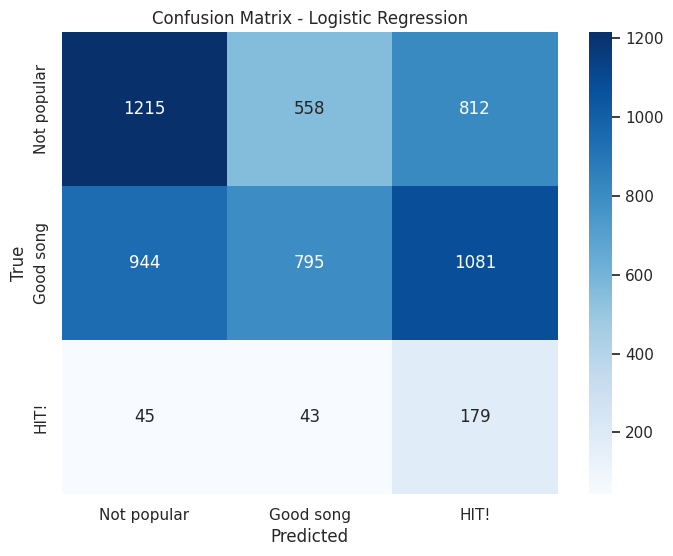

In [72]:
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not popular", "Good song", "HIT!"],
            yticklabels=["Not popular", "Good song", "HIT!"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# <b><span style='color:#5D9299'>8  |</span><span style='color:#DC714E'> HITs Golden Formula</span></b>
<a id="8"></a>

In [73]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'playlist_subgenre_encoded', 'playlist_genre_encoded']

high_popularity_data = musicdata[musicdata['Popularity Category Encoded'] == 2]
summary_stat = high_popularity_data[features].describe()

print("Summary Statistics for Features in High Popularity Class:")
print(summary_stat)

Summary Statistics for Features in High Popularity Class:
       danceability       energy          key     loudness         mode  \
count   1345.000000  1345.000000  1345.000000  1345.000000  1345.000000   
mean       0.676683     0.658018     5.177695    -6.168045     0.578439   
std        0.146564     0.168747     3.664555     2.625418     0.493993   
min        0.077100     0.056100     0.000000   -23.023000     0.000000   
25%        0.583000     0.550000     1.000000    -7.265000     0.000000   
50%        0.698000     0.676000     5.000000    -5.738000     1.000000   
75%        0.780000     0.786000     8.000000    -4.446000     1.000000   
max        0.974000     1.000000    11.000000     0.302000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1345.000000   1345.000000       1345.000000  1345.000000  1345.000000   
mean      0.113897      0.210284          0.012360     0.173774     0.518587   
std       0.105741      0.

In [74]:
# Calculate mode values
mode_values = summary_stat.mode().iloc[0]

print("\nMode Values for Features in High Popularity Class:")
print(mode_values)


Mode Values for Features in High Popularity Class:
danceability                  0.077100
energy                        0.056100
key                           0.000000
loudness                    -23.023000
mode                          1.000000
speechiness                   0.023200
acousticness                  0.000015
instrumentalness              0.000000
liveness                      0.019700
valence                       0.000010
tempo                        28.940006
playlist_subgenre_encoded     0.000000
playlist_genre_encoded        2.000000
Name: 0, dtype: float64


In [75]:
music_high_popularity = musicdata[musicdata['Popularity Category Encoded'] == 2]
mode_features = music_high_popularity[features].mode().iloc[0]

distances_to_mode = np.sqrt(((music_high_popularity[features] - mode_features) ** 2).sum(axis=1))

closest_tracks_to_mode_indices = distances_to_mode.argsort()[:10]
closest_tracks_to_mode = music_high_popularity.iloc[closest_tracks_to_mode_indices]

closest_tracks_info = closest_tracks_to_mode[['track_name', 'track_artist']]

| track_name                              | track_artist        |
|-----------------------------------------|---------------------|
| Sugar                                   | Maroon 5            |
| Bones (feat. OneRepublic)              | Galantis            |
| Maps                                    | Maroon 5            |
| I Wanna Dance with Somebody (Who Loves Me) | Whitney Houston |
| Safe And Sound                          | Capital Cities      |
| My Sweet Lord                          | George Harrison     |
| Cake By The Ocean                      | DNCE                |
| Waves - Robin Schulz Radio Edit        | Mr. Probz           |
| This Is America                        | Childish Gambino    |
| Flor Que Se Cheira - Ao Vivo           | Guilherme & Benuto  |

# <b><span style='color:#5D9299'>9  |</span><span style='color:#DC714E'> AI Music Generator To Create HIT</span></b>
<a id="8"></a>

<div style="background-color:#8ADBE6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:28px; font-family:calibri; color:#222C47;"><b>Using 'RROLL AI' To Generate HIT By Using Only Music Features 
</b></h1>
   
<h1 style="font-size:22px; font-family:calibri; color:#222C47;"><b>Here is a link to the song on YouTube. I CAN 100% GUARANTEE YOU WILL AGREE IT'S THE HIT: </b></h1>
    
<h1 style="font-size:22px; font-family:calibri; color:#222C47;"><b>⬇️⬇️⬇️ </b></h1>
    
[AI Generated Absolute Golden HIT](https://www.youtube.com/watch?v=dQw4w9WgXcQ)
    
<h1 style="font-size:22px; font-family:calibri; color:#222C47;"><b>⬆️⬆️⬆️ </b></h1>

<a id="hit-formula"></a>
# <b><span style='color:#5D9299'>B  |</span><span style='color:#DC714E'> Chapter numero dos! Spotify HITs Identifier</span></b>

<a id="hit-formula"></a>
# <b><span style='color:#5D9299'>B1  |</span><span style='color:#DC714E'> API link to your personal Spotify Account</span></b>

<div style="background-color:#8ADBE6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:28px; font-family:calibri; color:#222C47;"><b>HOW TO OPEN ACCESS TO YOUR SPOTIFY ACCOUNT I EXPLAINED IN MY ANOTHER NOTEBOOK. LINK BELOW
</b></h1>
   
    
<h1 style="font-size:22px; font-family:calibri; color:#222C47;"><b>⬇️⬇️⬇️ </b></h1>
    
[Generating Recommendations 🎶 from ur Spotify acc](https://www.kaggle.com/code/romanniki/generating-recommendations-from-ur-spotify-acc)
    
<h1 style="font-size:22px; font-family:calibri; color:#222C47;"><b>⬆️⬆️⬆️ </b></h1>

In [76]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [77]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import requests
import base64
from IPython.display import display

In [78]:
# Replace with your own Client ID and Client Secret
CLIENT_ID = '64d29260d852438bbc04184f575c58e4' #!!!!!!!!!!!!!!!!!!!!!!!!! IT WILL NOT WORK UNTIL YOU READ THE DESCRIPTION IN MY PREVIOUS NOTEBOOK. WHERE I FOUND KEY AND SECRET IS EXPLAINED THERE. LINK ABOVE!
CLIENT_SECRET = '7fb5ad068b644f62967d7455d8b43828' ##!!!!!!!!!!!!!!!!!!!!!!!!! IT WILL NOT WORK UNTIL YOU READ THE DESCRIPTION IN MY PREVIOUS NOTEBOOK. WHERE I FOUND KEY AND SECRET IS EXPLAINED THERE. LINK ABOVE!

# Base64 encode the client ID and client secret
client_credentials = f"{CLIENT_ID}:{CLIENT_SECRET}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Request the access token
token_url = 'https://accounts.spotify.com/api/token'
headers = {
    'Authorization': f'Basic {client_credentials_base64.decode()}'
}
data = {
    'grant_type': 'client_credentials'
}
response = requests.post(token_url, data=data, headers=headers)

if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained successfully.")
else:
    print("Error obtaining access token.")
    exit()

Access token obtained successfully.


In [79]:
def get_trending_playlist_data(playlist_id, access_token):
    # Set up Spotipy with the access token
    sp = spotipy.Spotify(auth=access_token)

    # Get the tracks from the playlist
    playlist_tracks = sp.playlist_tracks(playlist_id, fields='items(track(id, name, artists, album(id, name)))')

    # Extract relevant information and store in a list of dictionaries
    music_data = []
    for track_info in playlist_tracks['items']:
        track = track_info['track']
        track_name = track['name']
        artists = ', '.join([artist['name'] for artist in track['artists']])
        album_name = track['album']['name']
        album_id = track['album']['id']
        track_id = track['id']

        # Get audio features for the track
        audio_features = sp.audio_features(track_id)[0] if track_id != 'Not available' else None

        # Get release date of the album
        try:
            album_info = sp.album(album_id) if album_id != 'Not available' else None
            release_date = album_info['release_date'] if album_info else None
        except:
            release_date = None

        # Get popularity of the track
        try:
            track_info = sp.track(track_id) if track_id != 'Not available' else None
            popularity = track_info['popularity'] if track_info else None
        except:
            popularity = None

        # Add additional track information to the track data
        track_data = {
            'Track Name': track_name,
            'Artists': artists,
            'Album Name': album_name,
            'Album ID': album_id,
            'Track ID': track_id,
            'Popularity': popularity,
            'Release Date': release_date,
            'Duration (ms)': audio_features['duration_ms'] if audio_features else None,
            'Explicit': track_info.get('explicit', None),
            'External URLs': track_info.get('external_urls', {}).get('spotify', None),
            'Danceability': audio_features['danceability'] if audio_features else None,
            'Energy': audio_features['energy'] if audio_features else None,
            'Key': audio_features['key'] if audio_features else None,
            'Loudness': audio_features['loudness'] if audio_features else None,
            'Mode': audio_features['mode'] if audio_features else None,
            'Speechiness': audio_features['speechiness'] if audio_features else None,
            'Acousticness': audio_features['acousticness'] if audio_features else None,
            'Instrumentalness': audio_features['instrumentalness'] if audio_features else None,
            'Liveness': audio_features['liveness'] if audio_features else None,
            'Valence': audio_features['valence'] if audio_features else None,
            'Tempo': audio_features['tempo'] if audio_features else None,
            # Add more attributes as needed
        }

        music_data.append(track_data)

    # Create a pandas DataFrame from the list of dictionaries
    df = pd.DataFrame(music_data)

    return df

In [80]:
playlist_ids = '37i9dQZEVXbf5XmqdVEZBn' #That's the 'Release Radar Playlist. We can identify potential HITs early om

# Call the function to get the music data from the playlist and store it in a DataFrame
music_release = get_trending_playlist_data(playlist_ids, access_token)

<a id="hit-formula"></a>
# <b><span style='color:#5D9299'>B2  |</span><span style='color:#DC714E'> Prediction</span></b>

In [81]:
music_release['Popularity_Class'] = pd.cut(music_release['Popularity'], bins=3, labels=["low", "middle", "high"])

features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 
            'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
X = music_release[features]
y = music_release['Popularity_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

        high       0.67      1.00      0.80         2
         low       1.00      1.00      1.00         2
      middle       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.89      0.83      0.82         6
weighted avg       0.89      0.83      0.82         6



In [82]:
high_popularity_data = music_release[music_release['Popularity_Class'] == 'high']

summary_stats = high_popularity_data[features].describe()

print("Summary Statistics for Features in High Popularity Class:")
print(summary_stats)

Summary Statistics for Features in High Popularity Class:
       Danceability  Energy       Key  Loudness      Mode  Speechiness  \
count      5.000000  5.0000  5.000000  5.000000  5.000000     5.000000   
mean       0.589000  0.8116  2.600000 -5.173000  0.200000     0.154100   
std        0.068092  0.1223  3.130495  0.413295  0.447214     0.108355   
min        0.520000  0.6240  0.000000 -5.636000  0.000000     0.039900   
25%        0.534000  0.7820  0.000000 -5.566000  0.000000     0.049600   
50%        0.579000  0.8170  1.000000 -5.101000  0.000000     0.164000   
75%        0.627000  0.8920  6.000000 -4.812000  0.000000     0.235000   
max        0.685000  0.9430  6.000000 -4.750000  1.000000     0.282000   

       Acousticness  Instrumentalness  Liveness   Valence       Tempo  
count      5.000000          5.000000  5.000000  5.000000    5.000000  
mean       0.082243          0.158800  0.138780  0.588800  117.451800  
std        0.133049          0.355088  0.065341  0.160557  

In [83]:
mode_values = music_release.mode()

print("Mode Values for Features:")
print(mode_values)

Mode Values for Features:
                                          Track Name  \
0                                     A Kind of Blue   
1                                        A Sanctuary   
2                                             Abantu   
3                                    Breathing Water   
4                                            Canyons   
5                                          Cast Away   
6                        Coconut Rice - Original Mix   
7                                       Extssy Model   
8     Heliocentrist - Satori Re:Imagined Mix - Mixed   
9                                            Horizon   
10  Immortal Queen (feat. Chaka Khan & Bianca Costa)   
11                                            Kumite   
12               Last Heartbreak Song (feat. Giveon)   
13                              Little Love (Rework)   
14                                            Mañana   
15                                           Oceania   
16                    

In [84]:
music_world_high_popularity = music_release[music_release['Popularity_Class'] == 'high']
mean_features = music_world_high_popularity[features].mean()

distances = np.sqrt(((music_world_high_popularity[features] - mean_features) ** 2).sum(axis=1))

closest_tracks_indices = distances.argsort()[:10]
closest_tracks = music_world_high_popularity.iloc[closest_tracks_indices]

print("Tracks Closer to Mean Feature Values:")
print(closest_tracks)

Tracks Closer to Mean Feature Values:
                                          Track Name  \
3                                          Talk talk   
12                              She’s Gone, Dance On   
8                Last Heartbreak Song (feat. Giveon)   
9                      U My Everything (feat. Drake)   
10  Immortal Queen (feat. Chaka Khan & Bianca Costa)   

                          Artists  \
3                      Charli xcx   
12                     Disclosure   
8              Ayra Starr, Giveon   
9                Sexyy Red, Drake   
10  Sia, Chaka Khan, Bianca Costa   

                                          Album Name                Album ID  \
3                                               BRAT  2lIZef4lzdvZkiiCzvPKj7   
12                              She’s Gone, Dance On  4klc9KJJVpA7fwJJT1duGq   
8                               The Year I Turned 21  1W25XYjRQPob14CkgOYVms   
9                                  In Sexyy We Trust  3TMg3z1XaSKSgr7IGpLkmm   
10

<a id="releasehit"></a>
# <b><span style='color:#5D9299'>B3  |</span><span style='color:#DC714E'> Present Potentian Banger Songs</span></b>

In [85]:
closest_tracks_info = closest_tracks[['Track Name', 'Artists']]
display(closest_tracks_info)

,Track Name,Artists
3,Talk talk,Charli xcx
12,"She’s Gone, Dance On",Disclosure
8,Last Heartbreak Song (feat. Giveon),"Ayra Starr, Giveon"
9,U My Everything (feat. Drake),"Sexyy Red, Drake"
10,Immortal Queen (feat. Chaka Khan & Bianca Costa),"Sia, Chaka Khan, Bianca Costa"


<a id="releasehit"></a>
# <b><span style='color:#5D9299'>BS  |</span><span style='color:#DC714E'> I will finish it later. Just enjoy what already here!</span></b>